<a href="https://colab.research.google.com/github/mani6496/Amazon-Customer-Review/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('kyphosis.csv')

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.shape

(81, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


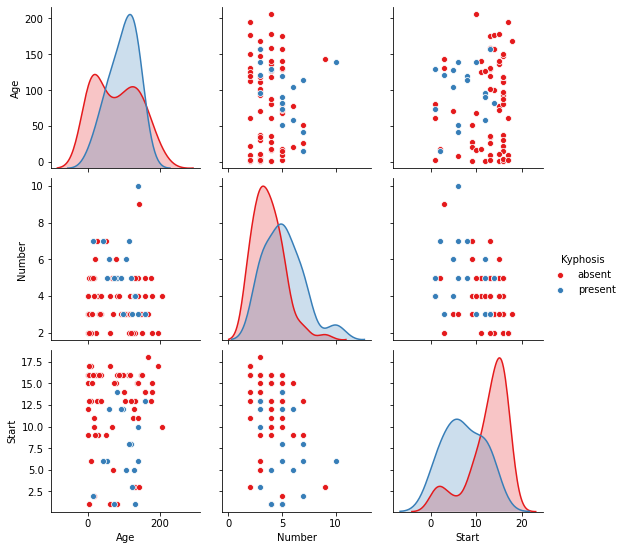

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('Kyphosis',axis=1)

In [ ]:
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=50)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [ ]:
print(f'model Accuracy:{dtree.score(X_train,y_train)}')

model Accuracy:1.0


In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[15  6]
 [ 2  2]]
              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

    accuracy                           0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25



In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [ ]:
dtree.tree_.node_count

23

In [ ]:
dtree.tree_.max_depth

5

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds,pos_label='present')
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,preds,pos_label='abesent')
dt_roc_auc=metrics.auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


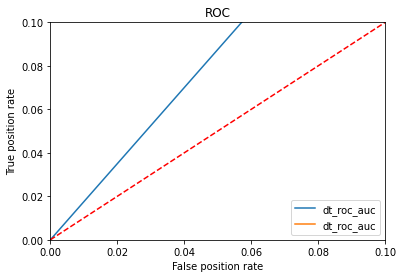

In [ ]:
plt.plot(fpr,tpr,label='dt_roc_auc')
plt.plot(fpr1,tpr1,label='dt_roc_auc')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,0.1])
plt.ylim([0.0,0.1])
plt.xlabel('False position rate')
plt.ylabel('True position rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

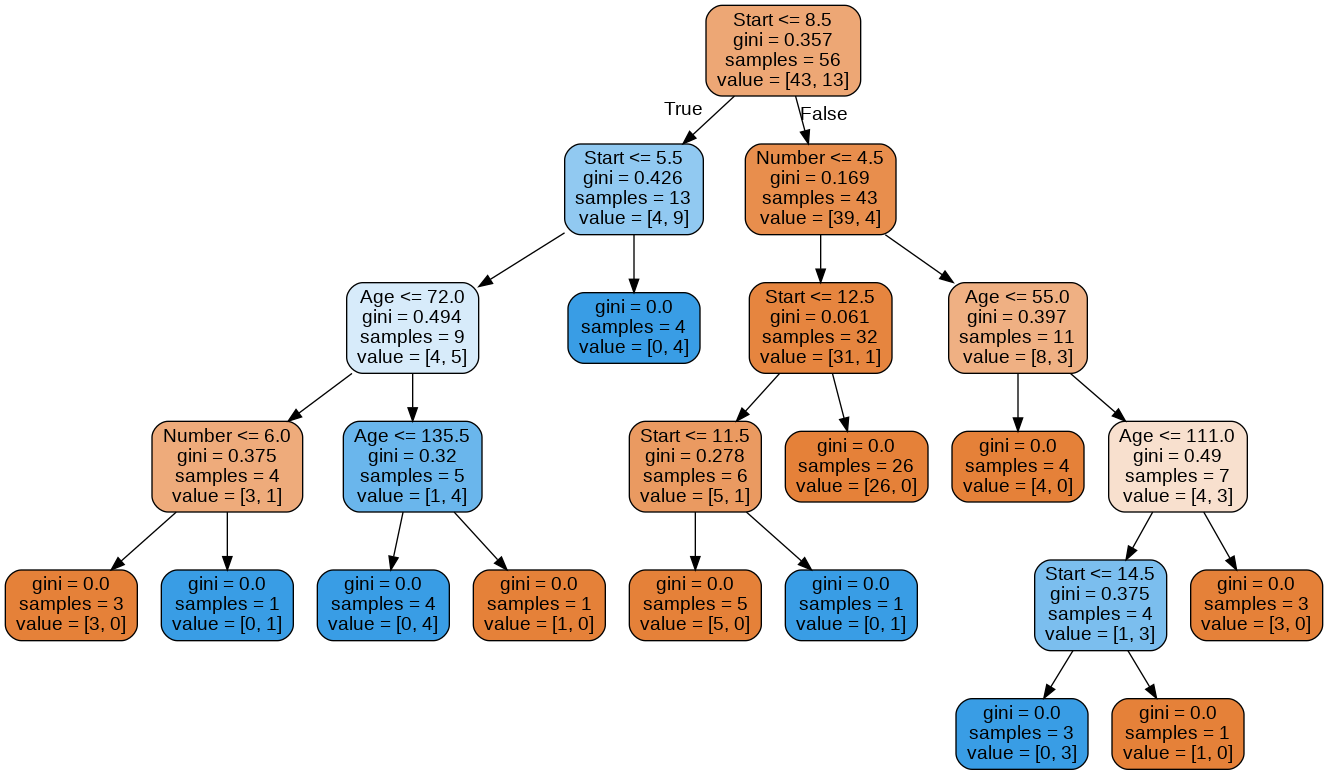

In [ ]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
f1 = pd.DataFrame({'feature':features,'importance':dtree.feature_importances_}).sort_values('importance',ascending=False)

In [ ]:
f1

,feature,importance
2,Start,0.586123
0,Age,0.290924
1,Number,0.122953
